## Naive Bayesian可视化案例

In [1]:
#导入必要的工具包
import pandas as pd
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt 
%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

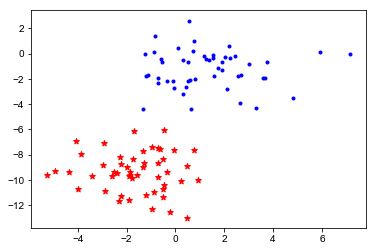

In [2]:
#产生两个方差相同的球形高斯数据
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)


idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)
X_0 = X[idx_0]
X_1 = X[idx_1]

color_list = ['red', 'blue']
mark_list = ['*', '.']

#散点图
fig, ax = plt.subplots()
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(X_0[:, 0], X_0[:, 1], c = color_list[0], marker = mark_list[0]) 
plt.scatter(X_1[:, 0], X_1[:, 1], c = color_list[1], marker = mark_list[1]) 
plt.show() 

[(-15, 5), (-8, 8)]

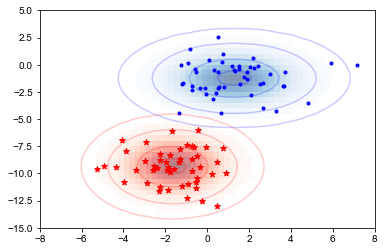

In [3]:
fig, ax = plt.subplots()

#散点图
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.scatter(X_0[:, 0], X_0[:, 1], c = color_list[0], marker = mark_list[0]) 
ax.scatter(X_1[:, 0], X_1[:, 1], c = color_list[1], marker = mark_list[1]) 
 
#网格显示，显示两个高斯分布的概率等高线
xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    
    mu, std = X[mask].mean(0), X[mask].std(0)
    
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    
    Pm = np.ma.masked_array(P, P < 0.03)
    
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

In [4]:
#非球形化
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

## 不同标准方差

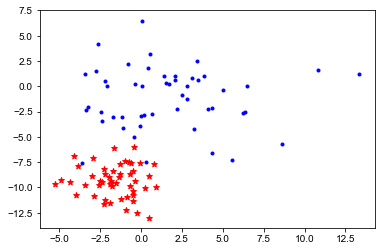

In [5]:
#两个方差不同的球形高斯
from sklearn.datasets import make_blobs
X_aniso, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=[1.5, 3.0])

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)
X_aniso_0 = X_aniso[idx_0]
X_aniso_1 = X_aniso[idx_1]

color_list = ['red', 'blue']
mark_list = ['*', '.']

fig, ax = plt.subplots()
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(X_aniso_0[:, 0], X_aniso_0[:, 1], c = color_list[0], marker = mark_list[0]) 
plt.scatter(X_aniso_1[:, 0], X_aniso_1[:, 1], c = color_list[1], marker = mark_list[1]) 
plt.show() 

[(-15, 5), (-8, 8)]

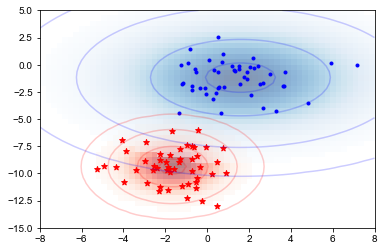

In [6]:
X = X_aniso

fig, ax = plt.subplots()
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.scatter(X_0[:, 0], X_0[:, 1], c = color_list[0], marker = mark_list[0]) 
ax.scatter(X_1[:, 0], X_1[:, 1], c = color_list[1], marker = mark_list[1]) 
 

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    
    mu, std = X[mask].mean(0), X[mask].std(0)
    
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    
    Pm = np.ma.masked_array(P, P < 0.03)
    
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

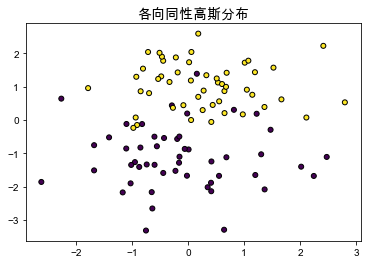

In [7]:
from sklearn.datasets import make_classification

plt.title(u'各向同性高斯分布', fontsize=14)
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

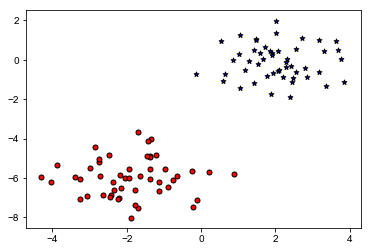

In [8]:
from numpy.random import multivariate_normal
#from scipy.spatial.transform import Rotation as R

mu1 = np.array([-2.0, -6.0])
cov1 = np.array([[1,    0],
                [ 0, 1]])

X1 = np.random.multivariate_normal(mu1, cov1, 50)
#X = R.from_euler('x', 45, degrees=True).apply(X)

mu2 = np.array([2.0, 0.0])
cov2 = np.array([[1,    0],
                [ 0, 1]])

X2 = np.random.multivariate_normal(mu2, cov2, 50)

xlim = (-8, 8)
ylim = (-15, 5)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c = 'r', s=25, edgecolor='k')
plt.scatter(X2[:, 0], X2[:, 1], marker='*', c = 'b', s=25, edgecolor='k')

plt.show()

In [9]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [10]:
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [11]:
def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([4, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [12]:
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('LDA')
        plt.ylabel(u'协方差相同')
    elif fig_index == 2:
        plt.title('QDA')
    elif fig_index == 3:
        plt.ylabel(u'协方差不同')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]

    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='o', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='o',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='x', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
    
    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')

In [13]:
def dataset_uncor_cov():
    '''Generate 2 Gaussians samples with the 2D 特征不相关'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[1.0, 0], [0, 1.0]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [14]:
def dataset_cor_cov():
    '''Generate 2 Gaussians samples with 2D 特征不相关'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[1.0, 2.0], [2.0, 1]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([4, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

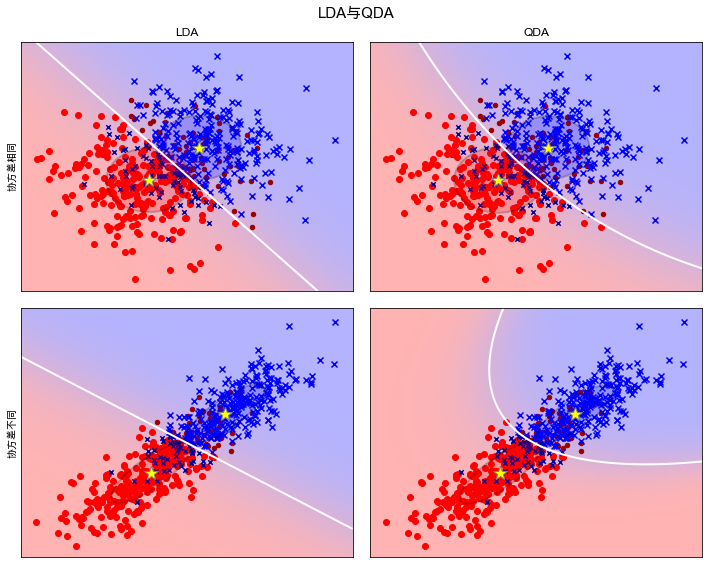

In [15]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle(u'LDA与QDA',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_uncor_cov(), dataset_cor_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## 朴素贝叶斯和QDA

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
def plot_data_nb(nb, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title(u'朴素贝叶斯')
        plt.ylabel(u'特征不相关')
    elif fig_index == 2:
        plt.title('QDA')
    elif fig_index == 3:
        plt.ylabel(u'特征相关')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]

    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='o', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='o',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='x', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = nb.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
    
    # means
    plt.plot(nb.theta_[0][0], nb.theta_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(nb.theta_[1][0], nb.theta_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_nb_cov(nb, splot):
    cov0 = np.diag(nb.sigma_[0])
    cov1 = np.diag(nb.sigma_[1])
    plot_ellipse(splot, nb.theta_[0], cov0, 'red')
    plot_ellipse(splot, nb.theta_[1], cov1, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in double_scalars


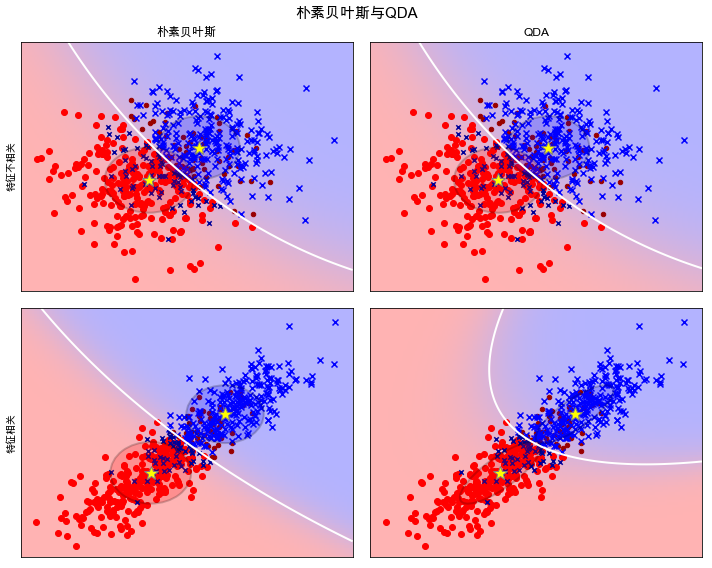

In [18]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle(u'朴素贝叶斯与QDA',
             y=0.98, fontsize=15)
#for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
for i, (X, y) in enumerate([dataset_uncor_cov(), dataset_cor_cov()]):
    # Linear Discriminant Analysis
    #lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    nb = GaussianNB()
    y_pred = nb.fit(X, y).predict(X)
    splot = plot_data_nb(nb, X, y, y_pred, fig_index=2 * i + 1)
    plot_nb_cov(nb, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()